`-` Transfer Learning

* 배치 사이즈: 배치 사이즈를 줄이면 learning_rate와 epoch을 감소시켜야 한다. (적어도 둘 중 하나는 감소)
* Scratch

`-` MH algorithme

In [1]:
p = function(x) {
    0.5*dnorm(x, 0, 1) + 0.5*dnorm(x, 5, 1)
}

In [2]:
set.seed(111)
xx = rnorm(1, 0, 1)     ## initial value. 일변량

for (j in 1:50000) {
    x = xx[length(xx)]
    y = rnorm(1, x, 1)  ## h(x, y). N(y | x, 1)
    u = runif(1)        ## 선택 확률 적용을 위한 변수

    a = (p(y)/p(x))     ## acceptance rate

    if (u < a) {
        xx = c(xx, y)
    } else {
        xx = c(xx, x)
    }
}

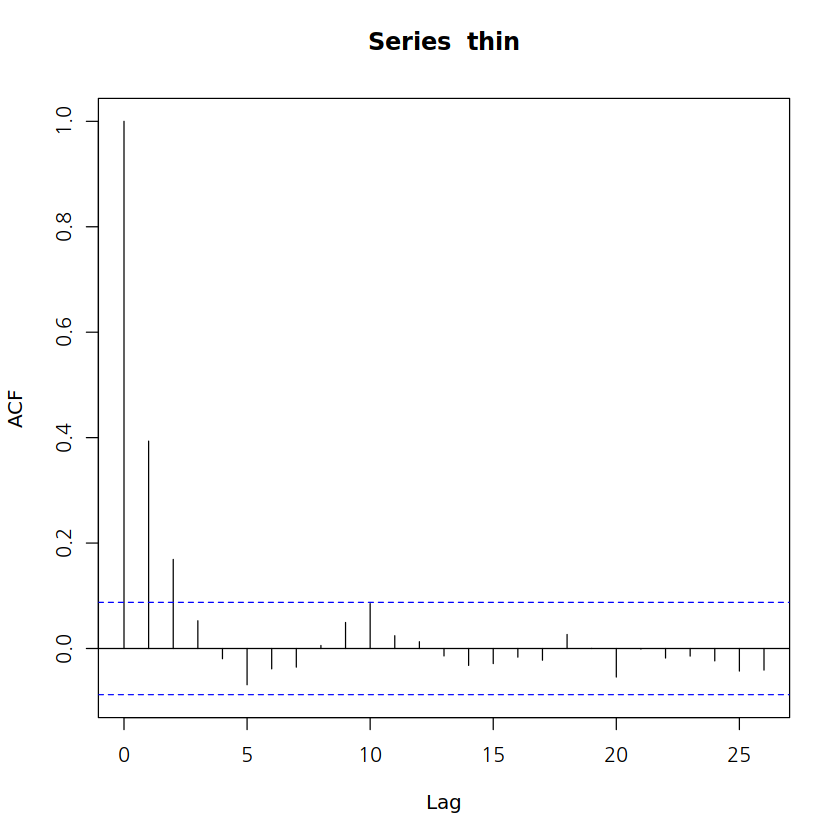

In [4]:
thin = xx[seq(25000, 50000, by = 50)]   ## burn-in + thinning
acf(thin)

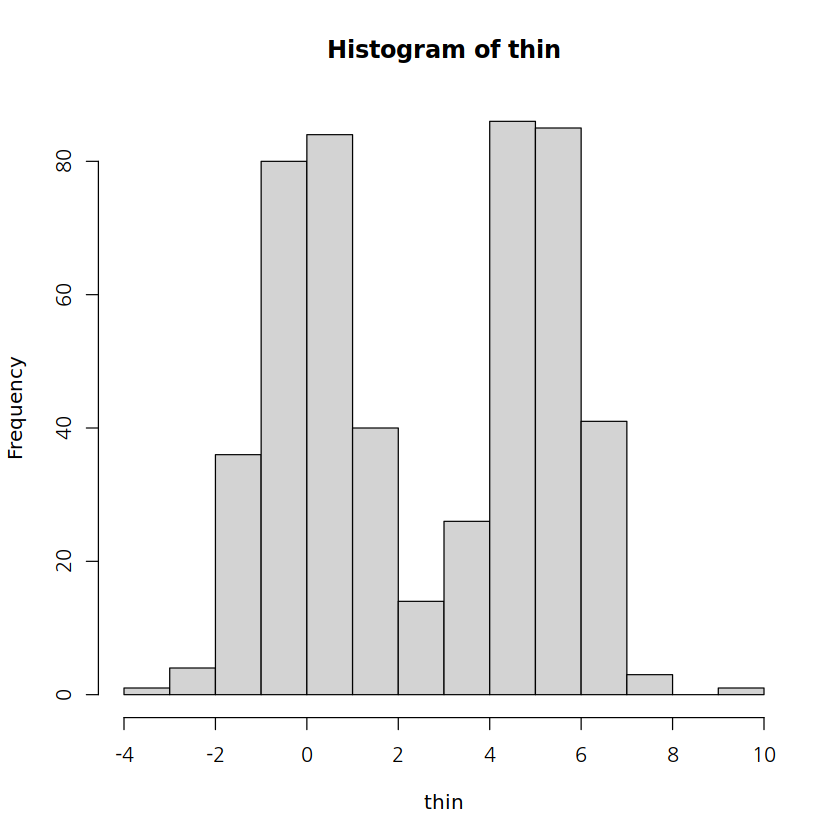

In [5]:
hist(thin)

`-` 수렴 정도 확인

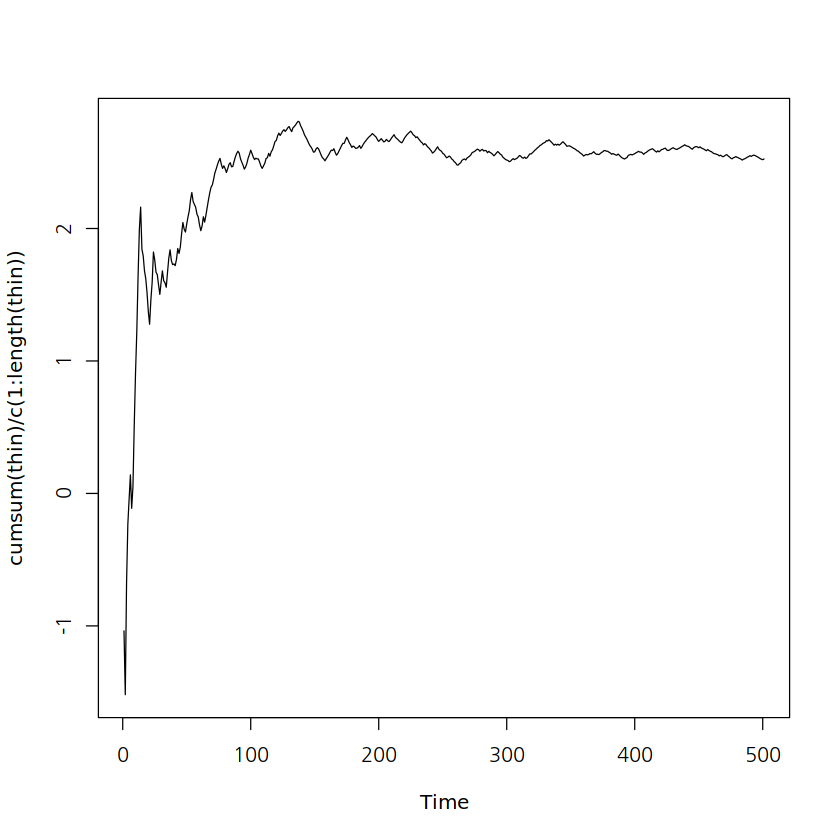

In [ ]:
ts.plot(cumsum(thin)/c(1:length(thin))) ## cummulate mean

In [7]:
t1 = thin

set.seed(222)       # initialization 
xx = rnorm(1,0,1)   ## initial value. 아무 값이나 해도 상관 없음.

for ( j in 1:50000) {
    x = xx[length(xx)]      # 맨 뒤의 x값
    y = rnorm(1,x,1)        # random walk proposal: x에서 분산 1로 튐. N(y | x, 1)
    u = runif(1)            # uniform r.v.: 선택 확률을 적용시키기 위한 변수
    if (u<(p(y)/p(x))) xx = c(xx,y)     # alpha 확률로 accept
    # min(1, p(y)/p(x) ) : acceptance prob. 
    if ((p(y)/p(x))<u) xx= c(xx,x)      # 1-alpha 확률로 reject
}

t2 = xx[seq(25000, 50000, by = 50)]

set.seed(333)       # initialization 
xx = rnorm(1,0,1)   ## initial value. 아무 값이나 해도 상관 없음.

for ( j in 1:50000) {
    x = xx[length(xx)]      # 맨 뒤의 x값
    y = rnorm(1,x,1)        # random walk proposal: x에서 분산 1로 튐. N(y | x, 1)
    u = runif(1)            # uniform r.v.: 선택 확률을 적용시키기 위한 변수
    if (u<(p(y)/p(x))) xx = c(xx,y)     # alpha 확률로 accept
    # min(1, p(y)/p(x) ) : acceptance prob. 
    if ((p(y)/p(x))<u) xx= c(xx,x)      # 1-alpha 확률로 reject
}

t3 = xx[seq(25000, 50000, by = 50)]

In [8]:
L = length(t1)
W = (var(t1)+var(t2)+var(t3))/3             ## 분산의 평균
B = L*var(c(mean(t1),mean(t2), mean(t3)))   ## mean의 분산을 계산
gel = (W*(L-1)/L + B/L)/W

print(gel)

[1] 0.9980283


> gelman score가 1에 가까울수록 stationary distribution에 잘 수렴한 것이다.